In [1]:
# Import package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# unzip
import zipfile
import os
# 
path = '../Data/'

[2021 World Happiness Data Source](https://www.kaggle.com/ajaypalsinghlo/world-happiness-report-2021)

- Ladder score: Happiness score or subjective well-being. This is the national average response to the question of life evaluations.
- Logged GDP per capita: The GDP-per-capita time series from one year to another using country specific forecasts of real GDP growth in the following year.
- Social support: Social support refers to assistance or support provided by members of social networks (like government) to an individual.
- Healthy life expectancy: Healthy life expectancy is the average life in good health - that is to say without irreversible limitation of activity in daily life or incapacities - of a fictitious generation subject to the conditions of mortality and morbidity prevailing that year.
- Freedom to make life choices: Freedom to make life choices is the national average of binary responses to the GWP question “Are you satisfied or dissatisfied with your freedom to choose what you do with your life?” ... It is defined as the average of laughter and enjoyment for other waves where the happiness question was not asked.
- Generosity: Generosity is the residual of regressing national average of response to the question “Have you donated money to a charity in the past month?” on GDP per capita.
- Perceptions of corruption: The measure is the national average of the survey responses to two questions in the GWP: “Is corruption widespread throughout the government or not” and “Is corruption widespread within businesses or not?”

In [2]:
# Authenticating With API Server
from kaggle.api.kaggle_api_extended import KaggleApi
api = KaggleApi()
api.authenticate()

In [3]:
# Download & move the download file(s) into Data folder
!kaggle datasets download -d "ajaypalsinghlo/world-happiness-report-2021"
!mv *.zip ../Data/
filename = !ls ../Data/*.zip

  0%|                                               | 0.00/55.2k [00:00<?, ?B/s]
100%|██████████████████████████████████████| 55.2k/55.2k [00:00<00:00, 2.42MB/s]


In [4]:
# Unzip
with zipfile.ZipFile(filename[0], mode='r') as unzipit:
    unzipit.extractall(path=path)
# Delete ZIP file
os.remove(filename[0])

In [5]:
#  Import Datasets
df2021 = pd.read_csv(path+'world-happiness-report-2021.csv')
dfhist = pd.read_csv(path+'world-happiness-report.csv')

In [6]:
df2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                149 non-null    object 
 1   Regional indicator                          149 non-null    object 
 2   Ladder score                                149 non-null    float64
 3   Standard error of ladder score              149 non-null    float64
 4   upperwhisker                                149 non-null    float64
 5   lowerwhisker                                149 non-null    float64
 6   Logged GDP per capita                       149 non-null    float64
 7   Social support                              149 non-null    float64
 8   Healthy life expectancy                     149 non-null    float64
 9   Freedom to make life choices                149 non-null    float64
 10  Generosity    

In [7]:
# Cleanup Datasets
# Listed conlumns are removed
columns = ["Ladder score in Dystopia", "upperwhisker", "lowerwhisker", "Explained by: Log GDP per capita",
           "Explained by: Social support", "Explained by: Healthy life expectancy", 
           "Explained by: Freedom to make life choices","Explained by: Generosity",
           "Explained by: Perceptions of corruption", "Standard error of ladder score", "Dystopia + residual"]
df2021.drop(columns, axis = 1, inplace=True)
df2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country name                  149 non-null    object 
 1   Regional indicator            149 non-null    object 
 2   Ladder score                  149 non-null    float64
 3   Logged GDP per capita         149 non-null    float64
 4   Social support                149 non-null    float64
 5   Healthy life expectancy       149 non-null    float64
 6   Freedom to make life choices  149 non-null    float64
 7   Generosity                    149 non-null    float64
 8   Perceptions of corruption     149 non-null    float64
dtypes: float64(7), object(2)
memory usage: 10.6+ KB


In [8]:
#Rename Columns
df2021 = df2021.rename(columns={'Country name': 'Country', 'Regional indicator': 'Region',
                        'Ladder score': 'Happy_score', 'Logged GDP per capita': 'Log_GDP_per_capita',
                        'Social support': 'Social_support_score', 'Healthy life expectancy': 'Life_expectancy', 
                        'Freedom to make life choices': 'Life_choice_score', 'Generosity': 'Generosity_score',
                        'Perceptions of corruption': 'Corruption_perception_score'
                       })
# Add year
df2021['Year'] = 2021
df2021.head()

,Country,Region,Happy_score,Log_GDP_per_capita,Social_support_score,Life_expectancy,Life_choice_score,Generosity_score,Corruption_perception_score,Year
0,Finland,Western Europe,7.842,10.775,0.954,72.0,0.949,-0.098,0.186,2021
1,Denmark,Western Europe,7.620,10.933,0.954,72.7,0.946,0.030,0.179,2021
2,Switzerland,Western Europe,7.571,11.117,0.942,74.4,0.919,0.025,0.292,2021
3,Iceland,Western Europe,7.554,10.878,0.983,73.0,0.955,0.160,0.673,2021
4,Netherlands,Western Europe,7.464,10.932,0.942,72.4,0.913,0.175,0.338,2021


In [9]:
df2021 = df2021[['Country', 'Region', 'Year', 'Happy_score', 'Log_GDP_per_capita',
       'Social_support_score', 'Life_expectancy', 'Life_choice_score',
       'Generosity_score', 'Corruption_perception_score']]
df2021.head()

,Country,Region,Year,Happy_score,Log_GDP_per_capita,Social_support_score,Life_expectancy,Life_choice_score,Generosity_score,Corruption_perception_score
0,Finland,Western Europe,2021,7.842,10.775,0.954,72.0,0.949,-0.098,0.186
1,Denmark,Western Europe,2021,7.620,10.933,0.954,72.7,0.946,0.030,0.179
2,Switzerland,Western Europe,2021,7.571,11.117,0.942,74.4,0.919,0.025,0.292
3,Iceland,Western Europe,2021,7.554,10.878,0.983,73.0,0.955,0.160,0.673
4,Netherlands,Western Europe,2021,7.464,10.932,0.942,72.4,0.913,0.175,0.338


In [10]:
# Drop any nulls
print('Before  ' + str(len(df2021)))
df2021.dropna(inplace=True)
print('After   ' + str(len(df2021)))

Before  149
After   149


In [11]:
# Historical Data
dfhist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1949 entries, 0 to 1948
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      1949 non-null   object 
 1   year                              1949 non-null   int64  
 2   Life Ladder                       1949 non-null   float64
 3   Log GDP per capita                1913 non-null   float64
 4   Social support                    1936 non-null   float64
 5   Healthy life expectancy at birth  1894 non-null   float64
 6   Freedom to make life choices      1917 non-null   float64
 7   Generosity                        1860 non-null   float64
 8   Perceptions of corruption         1839 non-null   float64
 9   Positive affect                   1927 non-null   float64
 10  Negative affect                   1933 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 167.6+ KB


In [12]:
# Listed conlumns are removed - historical
columns = ["Positive affect", "Negative affect"]
dfhist.drop(columns, axis = 1, inplace=True)
# 
#Rename Columns
dfhist = dfhist.rename(columns={'Country name': 'Country', 'year': 'Year', 'Life Ladder': 'Happy_score', 
                        'Social support': 'Social_support_score', 'Log GDP per capita': 'Log_GDP_per_capita',
                        'Healthy life expectancy at birth': 'Life_expectancy',
                        'Freedom to make life choices': 'Life_choice_score', 'Generosity': 'Generosity_score',
                        'Perceptions of corruption': 'Corruption_perception_score'
                       })
dfhist.head()

,Country,Year,Happy_score,Log_GDP_per_capita,Social_support_score,Life_expectancy,Life_choice_score,Generosity_score,Corruption_perception_score
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776


In [13]:
# Drop any nulls
print('Before  ' + str(len(dfhist)))
dfhist.dropna(inplace=True)
print('After   ' + str(len(dfhist)))

Before  1949
After   1712


In [14]:
dfhist.Year.value_counts()

2011    132
2017    132
2014    128
2015    127
2018    126
2019    126
2013    124
2016    124
2012    121
2010    112
2009    106
2008    102
2007     95
2020     81
2006     75
2005      1
Name: Year, dtype: int64

In [15]:
# Delete 2005 from historical
dfhist.drop(dfhist[dfhist['Year'] == 2005].index, inplace=True)
dfhist.head()

,Country,Year,Happy_score,Log_GDP_per_capita,Social_support_score,Life_expectancy,Life_choice_score,Generosity_score,Corruption_perception_score
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776


In [16]:
dfhist.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1711 entries, 0 to 1948
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Country                      1711 non-null   object 
 1   Year                         1711 non-null   int64  
 2   Happy_score                  1711 non-null   float64
 3   Log_GDP_per_capita           1711 non-null   float64
 4   Social_support_score         1711 non-null   float64
 5   Life_expectancy              1711 non-null   float64
 6   Life_choice_score            1711 non-null   float64
 7   Generosity_score             1711 non-null   float64
 8   Corruption_perception_score  1711 non-null   float64
dtypes: float64(7), int64(1), object(1)
memory usage: 133.7+ KB


In [17]:
# Apply Region to Historical dataset
happy = pd.merge(dfhist, df2021[['Country','Region']], how='inner', on = 'Country')
happy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1666 entries, 0 to 1665
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Country                      1666 non-null   object 
 1   Year                         1666 non-null   int64  
 2   Happy_score                  1666 non-null   float64
 3   Log_GDP_per_capita           1666 non-null   float64
 4   Social_support_score         1666 non-null   float64
 5   Life_expectancy              1666 non-null   float64
 6   Life_choice_score            1666 non-null   float64
 7   Generosity_score             1666 non-null   float64
 8   Corruption_perception_score  1666 non-null   float64
 9   Region                       1666 non-null   object 
dtypes: float64(7), int64(1), object(2)
memory usage: 143.2+ KB


In [18]:
happy = happy[['Country', 'Region', 'Year', 'Happy_score', 'Log_GDP_per_capita',
       'Social_support_score', 'Life_expectancy', 'Life_choice_score',
       'Generosity_score', 'Corruption_perception_score']]

In [19]:
happy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1666 entries, 0 to 1665
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Country                      1666 non-null   object 
 1   Region                       1666 non-null   object 
 2   Year                         1666 non-null   int64  
 3   Happy_score                  1666 non-null   float64
 4   Log_GDP_per_capita           1666 non-null   float64
 5   Social_support_score         1666 non-null   float64
 6   Life_expectancy              1666 non-null   float64
 7   Life_choice_score            1666 non-null   float64
 8   Generosity_score             1666 non-null   float64
 9   Corruption_perception_score  1666 non-null   float64
dtypes: float64(7), int64(1), object(2)
memory usage: 143.2+ KB


In [20]:
# Combine 2021 Dataset
happy = happy.append(df2021)
happy.sample(10)

,Country,Region,Year,Happy_score,Log_GDP_per_capita,Social_support_score,Life_expectancy,Life_choice_score,Generosity_score,Corruption_perception_score
1044,Namibia,Sub-Saharan Africa,2020,4.451,9.104,0.741,57.10,0.666,-0.104,0.810
687,Iraq,Middle East and North Africa,2020,4.785,9.167,0.708,61.40,0.700,-0.021,0.849
297,Chile,Latin America and Caribbean,2009,6.494,9.885,0.832,68.84,0.747,0.149,0.734
675,Iran,Middle East and North Africa,2016,4.653,9.561,0.566,65.40,0.773,0.186,0.713
1437,Switzerland,Western Europe,2009,7.525,11.055,0.938,72.26,0.891,0.125,0.342
1028,Mozambique,Sub-Saharan Africa,2017,4.280,7.157,0.678,53.20,0.823,-0.030,0.682
213,Bulgaria,Central and Eastern Europe,2013,3.993,9.813,0.829,66.00,0.603,-0.191,0.962
1272,Russia,Commonwealth of Independent States,2018,5.514,10.191,0.909,64.30,0.729,-0.147,0.865
1440,Switzerland,Western Europe,2015,7.572,11.100,0.938,73.20,0.928,0.109,0.210
982,Moldova,Commonwealth of Independent States,2015,6.017,9.246,0.840,62.90,0.595,-0.090,0.943


In [21]:
happy.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,1815.0,2013.956474,4.450980,2006.000,2010.0000,2014.000,2018.0000,2021.000
Happy_score,1815.0,5.469095,1.127006,2.375,4.6355,5.386,6.2720,7.971
Log_GDP_per_capita,1815.0,9.351504,1.147905,6.635,8.4430,9.476,10.3085,11.648
Social_support_score,1815.0,0.812118,0.119526,0.291,0.7435,0.836,0.9080,0.987
Life_expectancy,1815.0,63.545653,7.556205,32.300,58.6900,65.300,68.9000,77.100
Life_choice_score,1815.0,0.745750,0.140379,0.258,0.6530,0.766,0.8590,0.985
Generosity_score,1815.0,-0.003320,0.161869,-0.335,-0.1160,-0.029,0.0870,0.689
Corruption_perception_score,1815.0,0.748804,0.186398,0.035,0.6955,0.804,0.8710,0.983


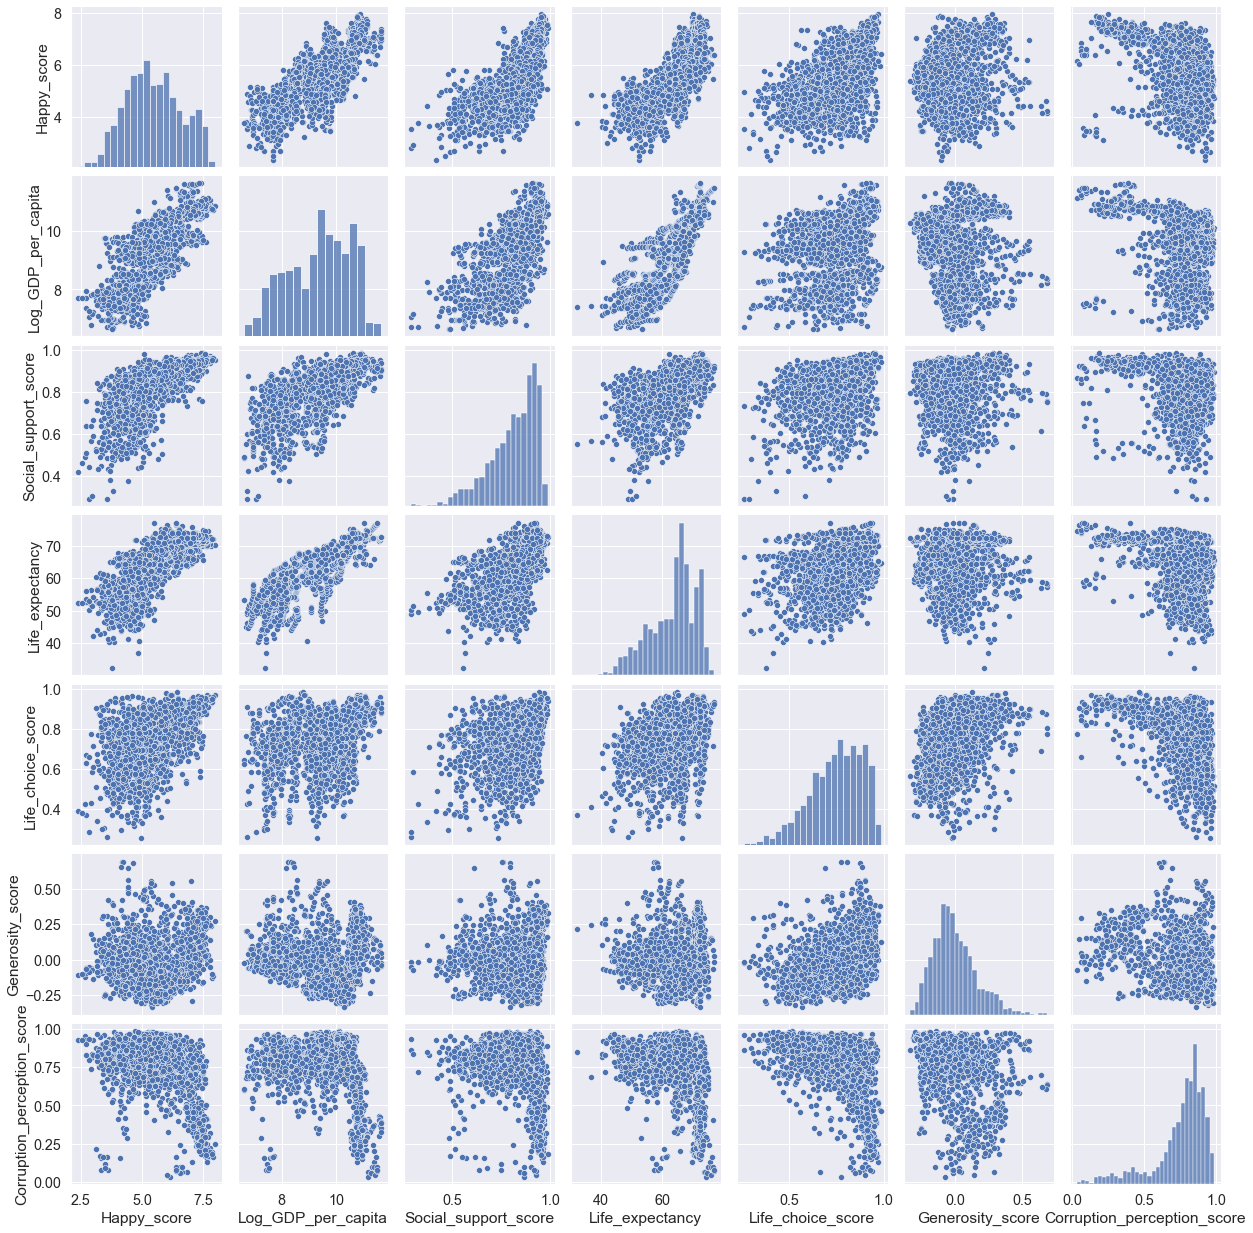

In [22]:
# Pair plot to show an overview of all of the data and their distributions.
# 
sns.set(font_scale = 1.3)
sns.pairplot(happy[['Happy_score', 
                    'Log_GDP_per_capita',
                    'Social_support_score',
                    'Life_expectancy',
                    'Life_choice_score',
                    'Generosity_score',
                    'Corruption_perception_score']])

# Show plot
plt.show();

- We have six factors contribution to Happiness were plotted above and there are at least three factors that contribute heavely on happiness score.

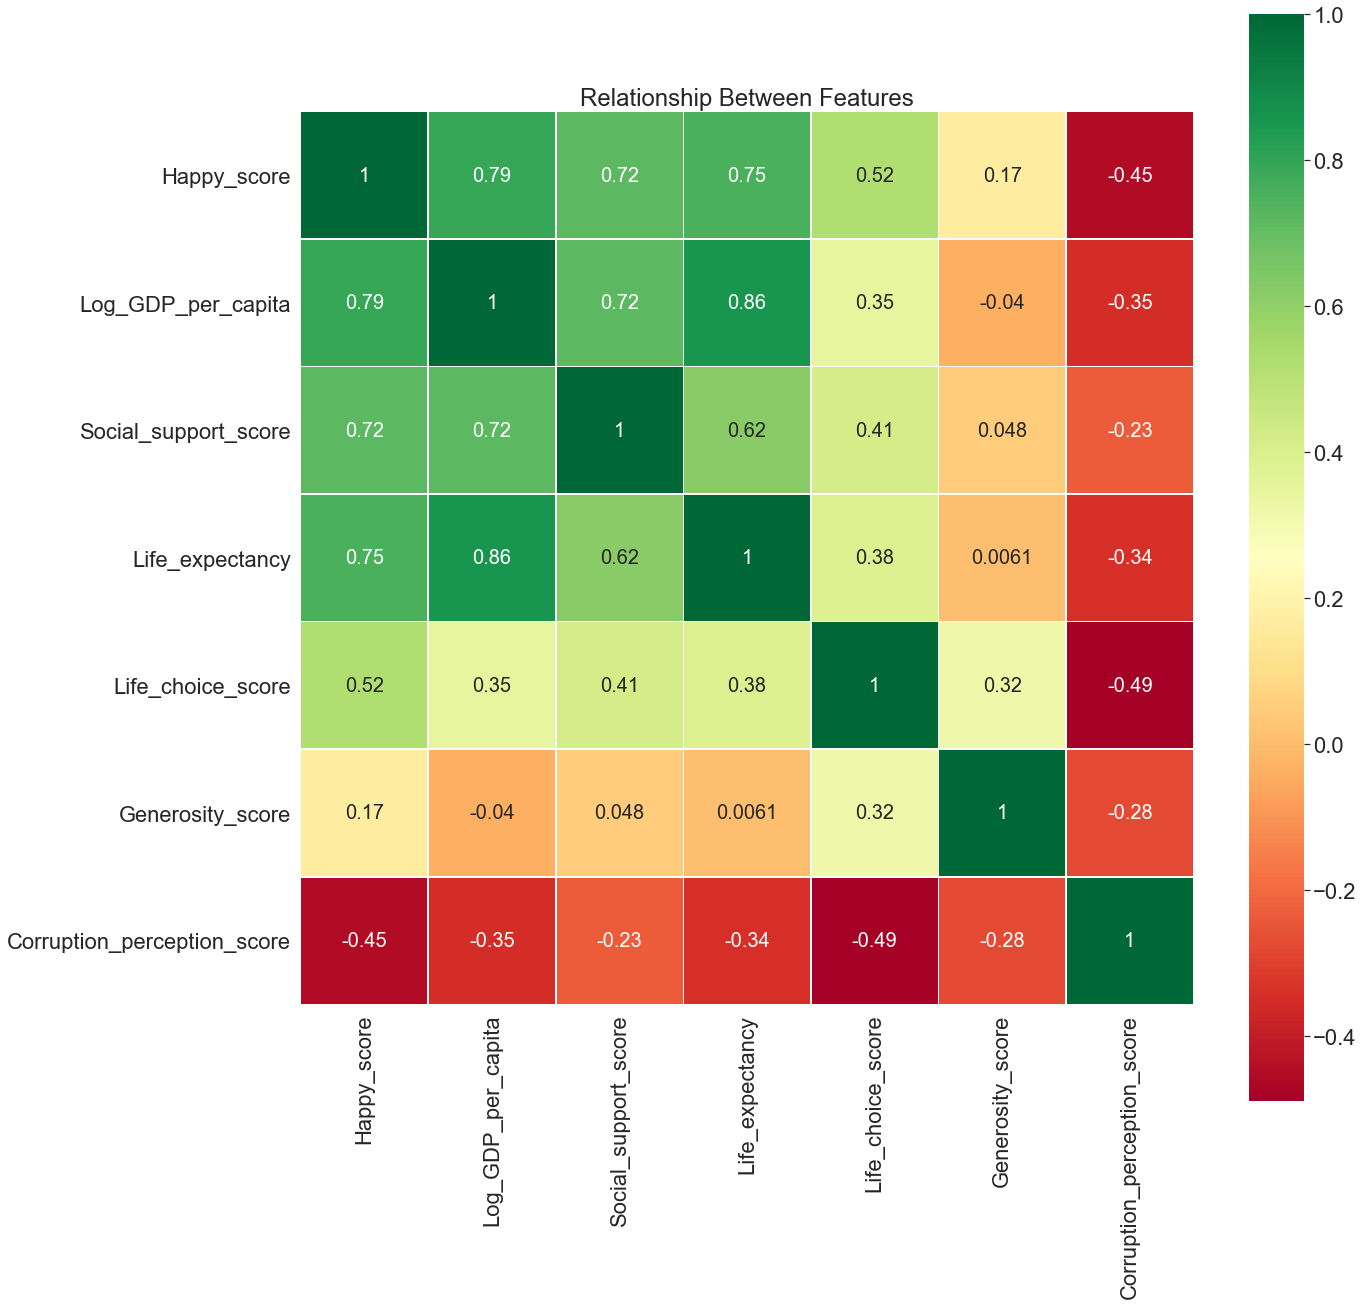

In [23]:
# Make a heatmap of the data
plt.figure(figsize=(20,20))
sns.set(font_scale = 2)
sns.heatmap(happy[['Happy_score', 
                    'Log_GDP_per_capita',
                    'Social_support_score',
                    'Life_expectancy',
                    'Life_choice_score',
                    'Generosity_score',
                    'Corruption_perception_score']].corr() ,
            annot=True, linewidths=.5, annot_kws={"size":20}, square=True, cmap='RdYlGn')
plt.title('Relationship Between Features')
plt.show()

### Examine importance of each features relating to Happiness Score

In [24]:
# 
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [25]:
# 
features = ['Log_GDP_per_capita','Social_support_score','Life_expectancy','Life_choice_score','Generosity_score',
                    'Corruption_perception_score']

# Separating out the features
x = happy.loc[:, features].values

In [26]:
# Standardizing the features
x = StandardScaler().fit_transform(x)
# 
# pca = PCA(n_components=6)
pca = PCA()
principalComponents = pca.fit_transform(x)

In [27]:
print(pca.explained_variance_ratio_)
var = pca.explained_variance_ratio_.cumsum()
print(var)

[0.49657446 0.22570114 0.11089574 0.08807723 0.05850448 0.02024695]
[0.49657446 0.72227559 0.83317133 0.92124856 0.97975305 1.        ]


#### Most important Factor in happiness Score:
1. GDP (50%)
2. Social Support (23%)
3. Life Expectancy (11%)
4. Life Choice (9%)
5. Generosity (6%)
6. Corruption Perception (2%)

##### Since GDP is the most significant piece regarding happiness, it makes me wonder if our current system of democracy is the best way to accumulate wealth?

### Lets explore Dataset

In [28]:
df2021.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,149.0,2021.000000,0.000000,2021.000,2021.000,2021.000,2021.000,2021.000
Happy_score,149.0,5.532839,1.073924,2.523,4.852,5.534,6.255,7.842
Log_GDP_per_capita,149.0,9.432208,1.158601,6.635,8.541,9.569,10.421,11.647
Social_support_score,149.0,0.814745,0.114889,0.463,0.750,0.832,0.905,0.983
Life_expectancy,149.0,64.992799,6.762043,48.478,59.802,66.603,69.600,76.953
Life_choice_score,149.0,0.791597,0.113332,0.382,0.718,0.804,0.877,0.970
Generosity_score,149.0,-0.015134,0.150657,-0.288,-0.126,-0.036,0.079,0.542
Corruption_perception_score,149.0,0.727450,0.179226,0.082,0.667,0.781,0.845,0.939


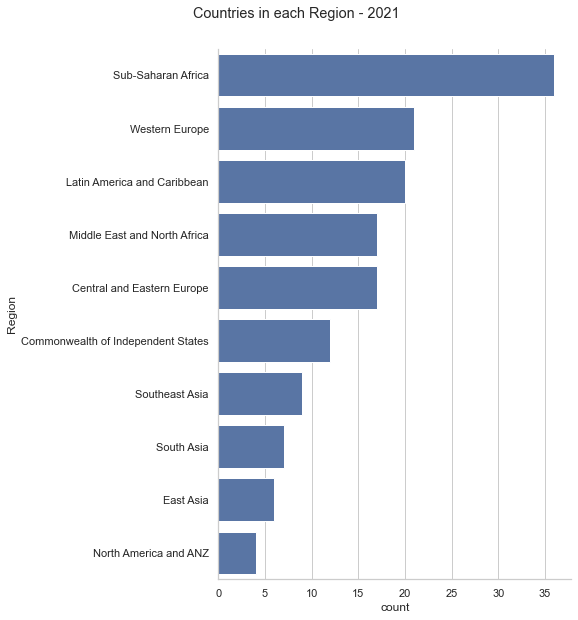

In [29]:
sns.reset_orig()
sns.set(style="whitegrid")
g = sns.catplot(y='Region', data=df2021, kind='count', height=8, color='b', orient='v', order=
                df2021['Region'].value_counts().index)
# g.set_xticklabels(rotation=90)
g.fig.suptitle('Countries in each Region - 2021', y=1.05)
plt.show()

In [30]:
# 
df2021_region_mean = df2021.groupby(by=['Region']).mean()
df2021_region_mean.reset_index(inplace=True)
df2021_region_mean.sort_values(by='Happy_score', ascending=False, inplace=True)

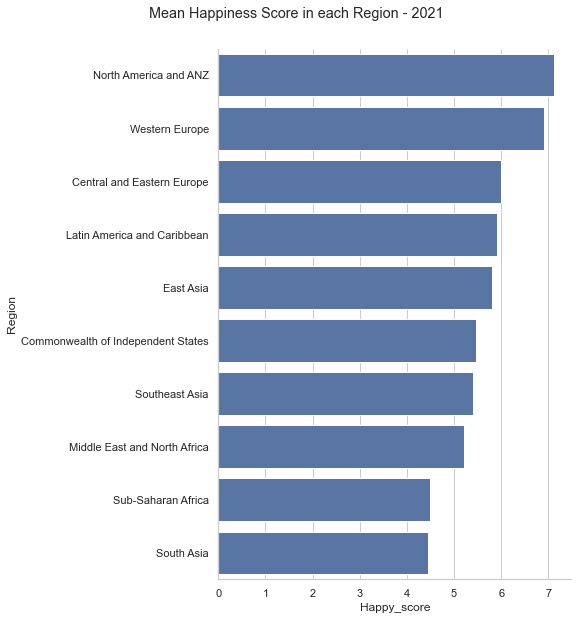

In [31]:
sns.reset_orig()
sns.set(style="whitegrid")
g = sns.catplot(y='Region', x='Happy_score', data=df2021_region_mean, kind='bar', height=8, color='b', orient='h')
# g.set_xticklabels(rotation=90)
g.fig.suptitle('Mean Happiness Score in each Region - 2021', y=1.05)
plt.show()

### Let's examine the entire Dataset

In [32]:
happy.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,1815.0,2013.956474,4.450980,2006.000,2010.0000,2014.000,2018.0000,2021.000
Happy_score,1815.0,5.469095,1.127006,2.375,4.6355,5.386,6.2720,7.971
Log_GDP_per_capita,1815.0,9.351504,1.147905,6.635,8.4430,9.476,10.3085,11.648
Social_support_score,1815.0,0.812118,0.119526,0.291,0.7435,0.836,0.9080,0.987
Life_expectancy,1815.0,63.545653,7.556205,32.300,58.6900,65.300,68.9000,77.100
Life_choice_score,1815.0,0.745750,0.140379,0.258,0.6530,0.766,0.8590,0.985
Generosity_score,1815.0,-0.003320,0.161869,-0.335,-0.1160,-0.029,0.0870,0.689
Corruption_perception_score,1815.0,0.748804,0.186398,0.035,0.6955,0.804,0.8710,0.983


In [33]:
happy_region_mean = happy.groupby(by=['Region']).mean()
happy_region_mean.reset_index(inplace=True)
happy_region_mean.sort_values(by='Happy_score', ascending=False, inplace=True)

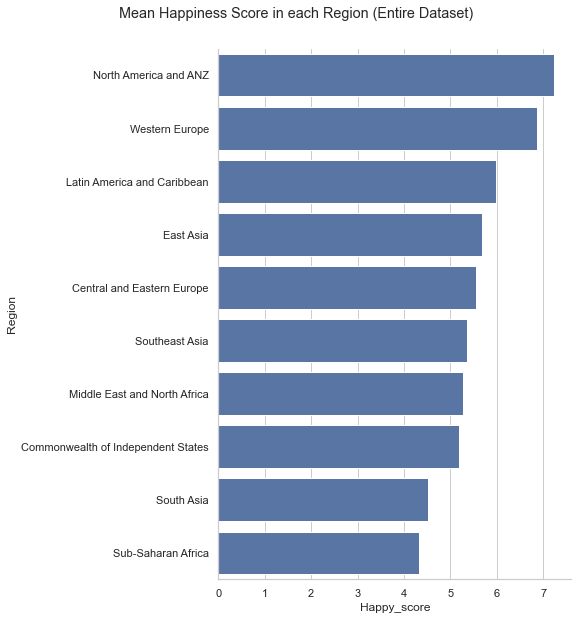

In [34]:
sns.reset_orig()
sns.set(style="whitegrid")
g = sns.catplot(y='Region', x='Happy_score', data=happy_region_mean, kind='bar', height=8, color='b', orient='h')
# g.set_xticklabels(rotation=90)
g.fig.suptitle('Mean Happiness Score in each Region (Entire Dataset)', y=1.05)
plt.show()

In [35]:
happy_region_year_mean = happy.groupby(by=['Region', 'Year']).mean()

In [36]:
happy_region_year_mean.reset_index(inplace=True)
happy_region_year_mean.sample(5)

,Region,Year,Happy_score,Log_GDP_per_capita,Social_support_score,Life_expectancy,Life_choice_score,Generosity_score,Corruption_perception_score
116,Southeast Asia,2010,5.452000,9.274714,0.815143,64.557143,0.834143,0.196429,0.746571
88,North America and ANZ,2014,7.262500,10.773750,0.921500,71.635000,0.915000,0.289500,0.464750
59,Latin America and Caribbean,2017,5.992650,9.372100,0.859750,66.660000,0.831500,-0.085150,0.789150
74,Middle East and North Africa,2016,5.160750,9.594500,0.756125,65.262500,0.699875,-0.036250,0.784875
75,Middle East and North Africa,2017,5.289222,9.598667,0.774000,65.733333,0.653778,-0.063222,0.770000


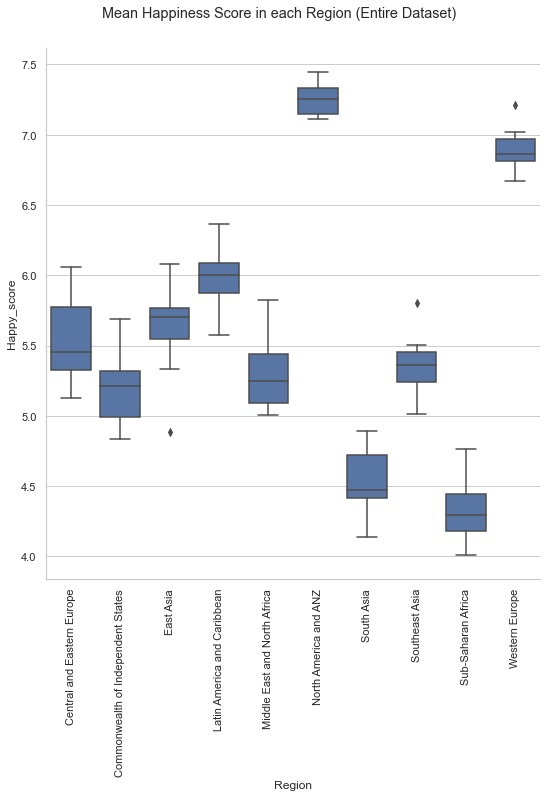

In [37]:
sns.reset_orig()
sns.set(style="whitegrid")
g = sns.catplot(x='Region', y='Happy_score', data=happy_region_year_mean, kind='box', height=8, color='b', orient='v')
g.set_xticklabels(rotation=90)
g.fig.suptitle('Mean Happiness Score in each Region (Entire Dataset)', y=1.05)
plt.show()

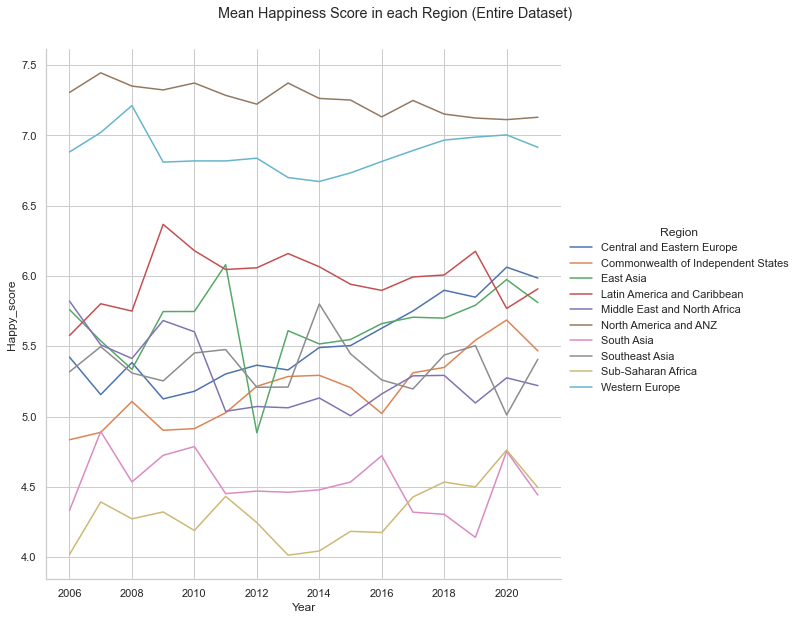

In [38]:
sns.reset_orig()
sns.set(style="whitegrid")
g = sns.relplot(x='Year',y='Happy_score', data=happy_region_year_mean, hue='Region', kind='line', height=8)
g.fig.suptitle('Mean Happiness Score in each Region (Entire Dataset)', y=1.05)
plt.show()

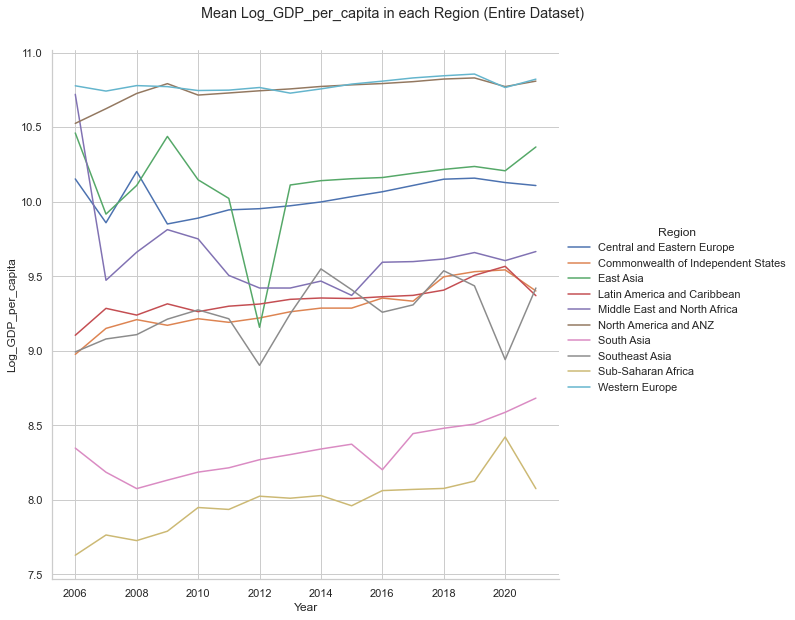

In [39]:
sns.reset_orig()
sns.set(style="whitegrid")
g = sns.relplot(x='Year',y='Log_GDP_per_capita', data=happy_region_year_mean, hue='Region', kind='line', height=8)
g.fig.suptitle('Mean Log_GDP_per_capita in each Region (Entire Dataset)', y=1.05)
plt.show()

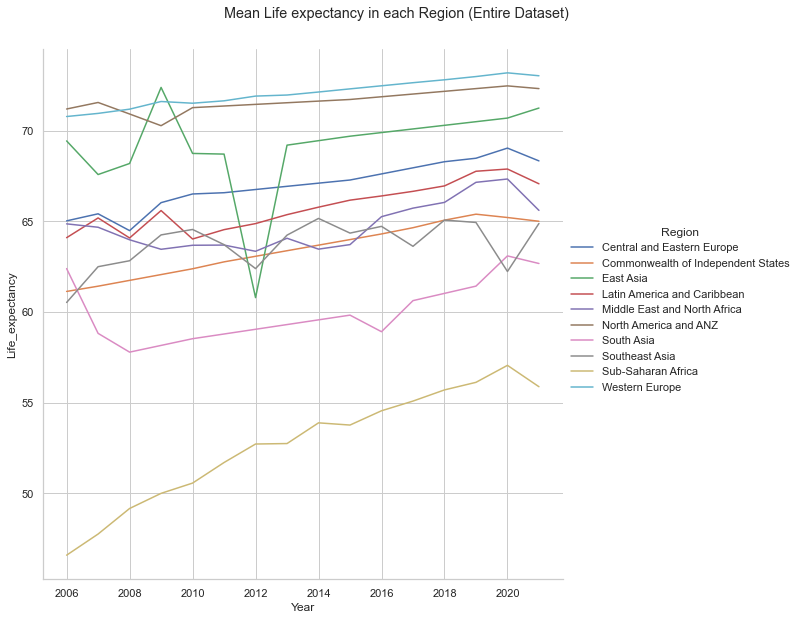

In [40]:
sns.reset_orig()
sns.set(style="whitegrid")
g = sns.relplot(x='Year',y='Life_expectancy', data=happy_region_year_mean, hue='Region', kind='line', height=8)
g.fig.suptitle('Mean Life expectancy in each Region (Entire Dataset)', y=1.05)
plt.show()

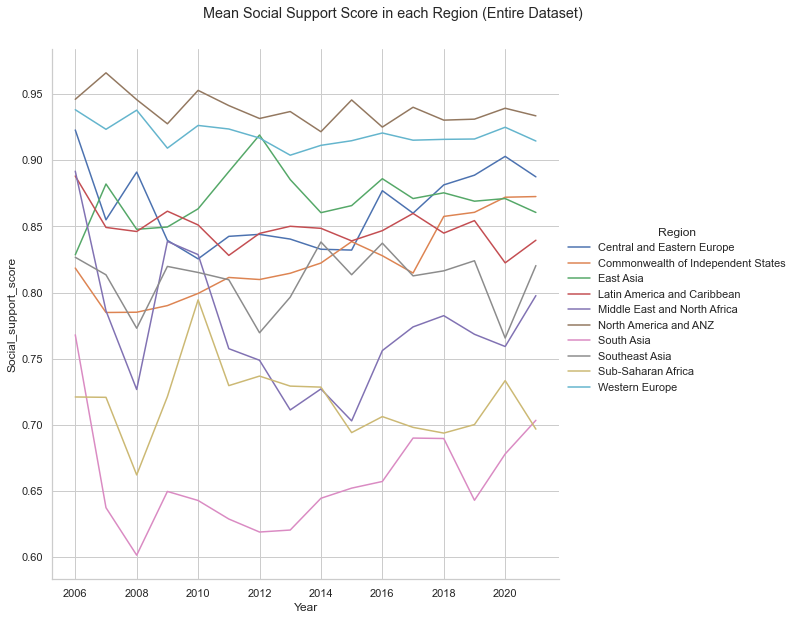

In [41]:
sns.reset_orig()
sns.set(style="whitegrid")
g = sns.relplot(x='Year',y='Social_support_score', data=happy_region_year_mean, hue='Region', kind='line', height=8)
g.fig.suptitle('Mean Social Support Score in each Region (Entire Dataset)', y=1.05)
plt.show()

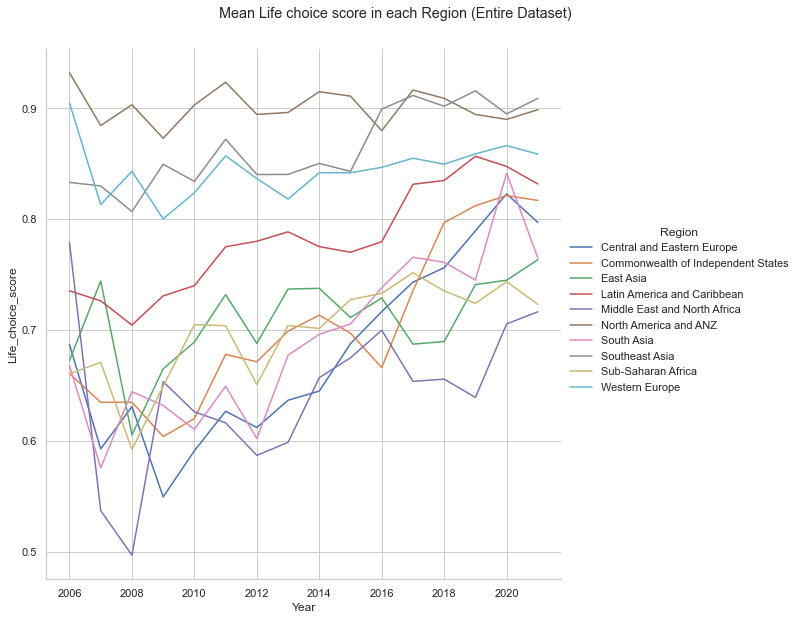

In [42]:
sns.reset_orig()
sns.set(style="whitegrid")
g = sns.relplot(x='Year',y='Life_choice_score', data=happy_region_year_mean, hue='Region', kind='line', height=8)
g.fig.suptitle('Mean Life choice score in each Region (Entire Dataset)', y=1.05)
plt.show()

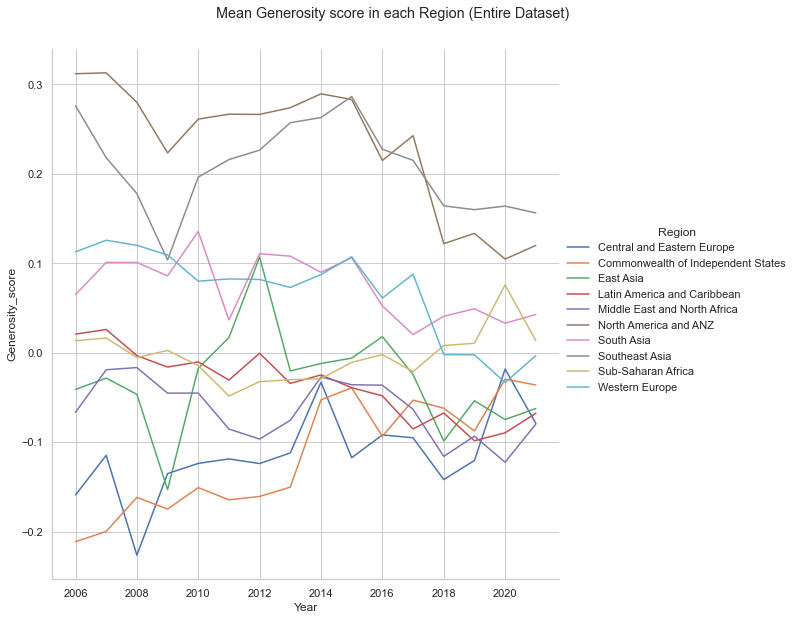

In [43]:
sns.reset_orig()
sns.set(style="whitegrid")
g = sns.relplot(x='Year',y='Generosity_score', data=happy_region_year_mean, hue='Region', kind='line', height=8)
g.fig.suptitle('Mean Generosity score in each Region (Entire Dataset)', y=1.05)
plt.show()

In [44]:
happy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1815 entries, 0 to 148
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Country                      1815 non-null   object 
 1   Region                       1815 non-null   object 
 2   Year                         1815 non-null   int64  
 3   Happy_score                  1815 non-null   float64
 4   Log_GDP_per_capita           1815 non-null   float64
 5   Social_support_score         1815 non-null   float64
 6   Life_expectancy              1815 non-null   float64
 7   Life_choice_score            1815 non-null   float64
 8   Generosity_score             1815 non-null   float64
 9   Corruption_perception_score  1815 non-null   float64
dtypes: float64(7), int64(1), object(2)
memory usage: 156.0+ KB


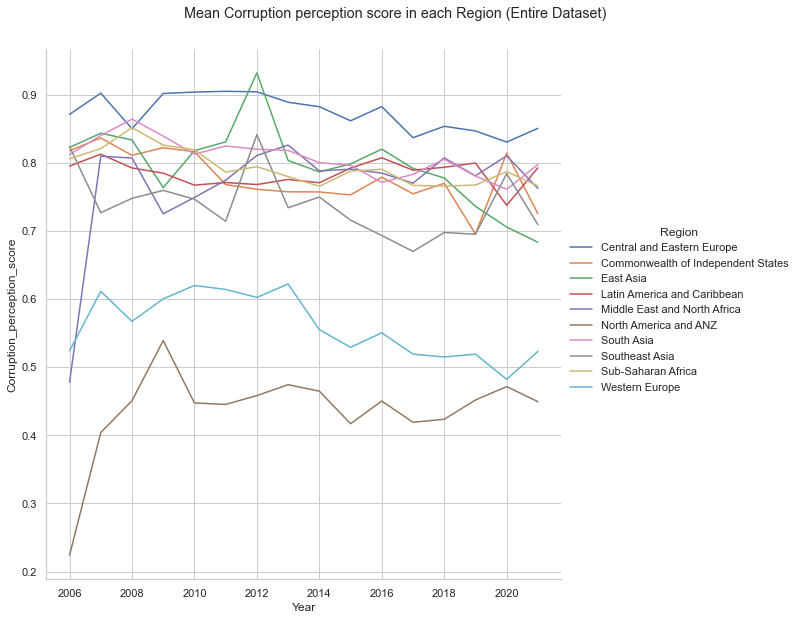

In [45]:
sns.reset_orig()
sns.set(style="whitegrid")
g = sns.relplot(x='Year',y='Corruption_perception_score', data=happy_region_year_mean, hue='Region', kind='line', height=8)
g.fig.suptitle('Mean Corruption perception score in each Region (Entire Dataset)', y=1.05)
plt.show()

#### There are positive and negative correlations amongst six features compared to Happiness from the above charts. 

#### Let's examine Asia:
 - It seems pretty evident that GDP and happiness are tightly related in East Asia from the above charts.
 - There seems to be a difference between different regions of Asia, so examine each region in Asia.
    

In [46]:
happy_region_year_mean.Region.value_counts()

Central and Eastern Europe            16
Commonwealth of Independent States    16
East Asia                             16
Latin America and Caribbean           16
Middle East and North Africa          16
North America and ANZ                 16
South Asia                            16
Southeast Asia                        16
Sub-Saharan Africa                    16
Western Europe                        16
Name: Region, dtype: int64

In [47]:
# cols = ['East Asia', 'Southeast Asia','South Asia']
cols = ['East Asia']
happy_region_year_mean_e_asia = happy_region_year_mean[happy_region_year_mean.Region.isin(cols)]

In [48]:
happy_region_year_mean_e_asia.columns

Index(['Region', 'Year', 'Happy_score', 'Log_GDP_per_capita',
       'Social_support_score', 'Life_expectancy', 'Life_choice_score',
       'Generosity_score', 'Corruption_perception_score'],
      dtype='object')

In [49]:
# Standardizing the features for a plot
features = ['Happy_score', 'Log_GDP_per_capita','Social_support_score', 'Life_expectancy', 'Life_choice_score',
            'Generosity_score', 'Corruption_perception_score']

asia_arry = StandardScaler().fit_transform(happy_region_year_mean_e_asia[features])

In [50]:
happy_region_year_mean_e_asia[features] = asia_arry

/usr/local/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [51]:
pca = PCA()
principalComponents = pca.fit_transform(happy_region_year_mean_e_asia.iloc[:, 3:])
print(pca.explained_variance_ratio_)
var = pca.explained_variance_ratio_.cumsum()
print(var)

[0.6616412  0.23435489 0.05596907 0.02838036 0.01787161 0.00178287]
[0.6616412  0.89599609 0.95196516 0.98034552 0.99821713 1.        ]


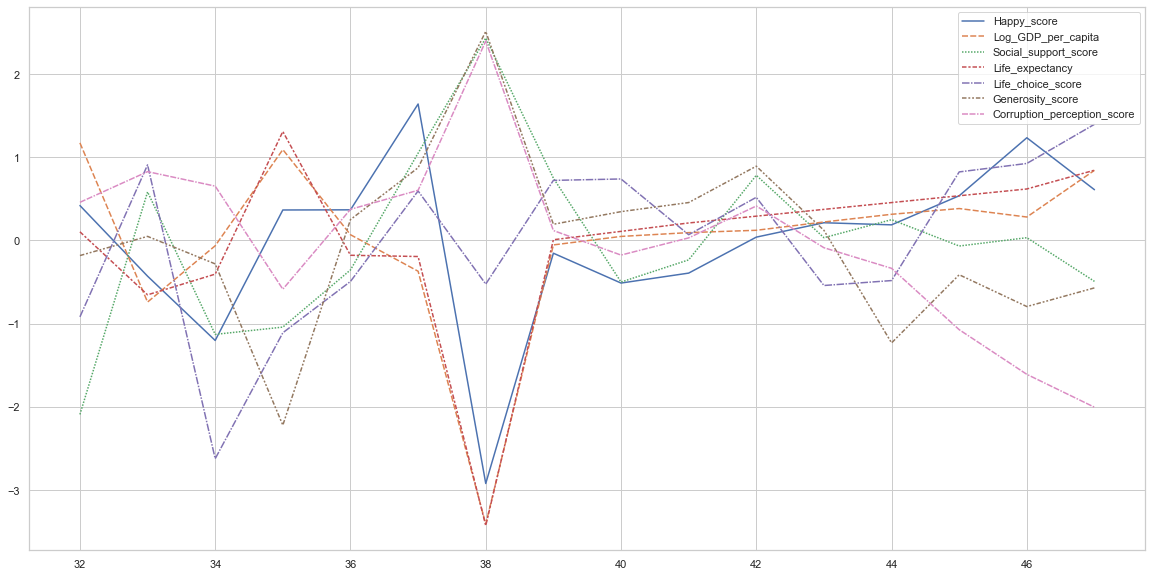

In [52]:
sns.reset_orig()
plt.figure(figsize=(20,10))
sns.set(style="whitegrid")
g = sns.lineplot(data=happy_region_year_mean_e_asia.iloc[:, 2:])

In [53]:
# East Asia
happy['Country'][happy['Region'].isin(cols)].unique()

array(['Japan', 'Mongolia', 'South Korea', 'Taiwan Province of China',
       'Hong Kong S.A.R. of China', 'China'], dtype=object)

In [54]:
# cols = ['East Asia', 'Southeast Asia','South Asia']
cols = ['Southeast Asia']
happy_region_year_mean_se_asia = happy_region_year_mean[happy_region_year_mean.Region.isin(cols)]
# 
# Standardizing the features for a plot
features = ['Happy_score', 'Log_GDP_per_capita','Social_support_score', 'Life_expectancy', 'Life_choice_score',
            'Generosity_score', 'Corruption_perception_score']

asia_arry = StandardScaler().fit_transform(happy_region_year_mean_se_asia[features])
# 
happy_region_year_mean_se_asia[features] = asia_arry

/usr/local/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [55]:
pca = PCA()
principalComponents = pca.fit_transform(happy_region_year_mean_se_asia.iloc[:, 3:])
print(pca.explained_variance_ratio_)
var = pca.explained_variance_ratio_.cumsum()
print(var)

[0.54863808 0.2121802  0.09902993 0.07824074 0.04715395 0.0147571 ]
[0.54863808 0.76081828 0.85984821 0.93808896 0.9852429  1.        ]


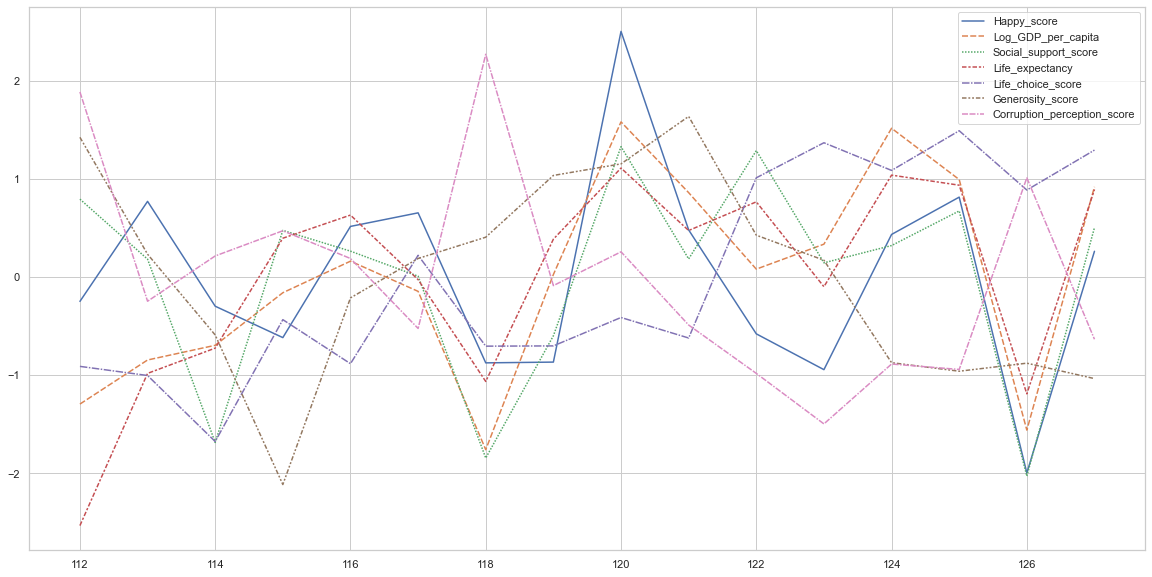

In [56]:
sns.reset_orig()
plt.figure(figsize=(20,10))
sns.set(style="whitegrid")
g = sns.lineplot(data=happy_region_year_mean_se_asia.iloc[:, 2:])

In [57]:
# Southeast Asia
happy['Country'][happy['Region'].isin(cols)].unique()

array(['Cambodia', 'Indonesia', 'Laos', 'Malaysia', 'Myanmar',
       'Philippines', 'Singapore', 'Thailand', 'Vietnam'], dtype=object)

In [58]:
# cols = ['East Asia', 'Southeast Asia','South Asia']
cols = ['South Asia']
happy_region_year_mean_s_asia = happy_region_year_mean[happy_region_year_mean.Region.isin(cols)]
# 
# Standardizing the features for a plot
features = ['Happy_score', 'Log_GDP_per_capita','Social_support_score', 'Life_expectancy', 'Life_choice_score',
            'Generosity_score', 'Corruption_perception_score']

asia_arry = StandardScaler().fit_transform(happy_region_year_mean_s_asia[features])
# 
happy_region_year_mean_s_asia[features] = asia_arry

/usr/local/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [59]:
pca = PCA()
principalComponents = pca.fit_transform(happy_region_year_mean_s_asia.iloc[:, 3:])
print(pca.explained_variance_ratio_)
var = pca.explained_variance_ratio_.cumsum()
print(var)

[0.71500665 0.12395955 0.08204249 0.05328241 0.01848663 0.00722227]
[0.71500665 0.83896621 0.92100869 0.9742911  0.99277773 1.        ]


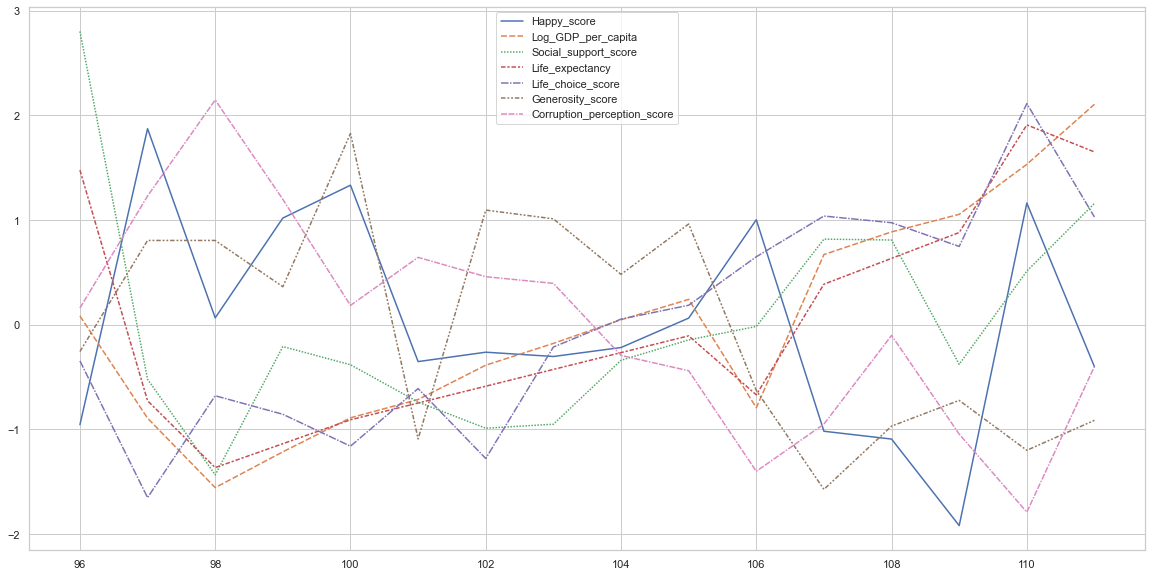

In [60]:
sns.reset_orig()
plt.figure(figsize=(20,10))
sns.set(style="whitegrid")
g = sns.lineplot(data=happy_region_year_mean_s_asia.iloc[:, 2:])

In [61]:
# South Asia
happy['Country'][happy['Region'].isin(cols)].unique()

array(['Afghanistan', 'Bangladesh', 'India', 'Nepal', 'Pakistan',
       'Sri Lanka', 'Maldives'], dtype=object)

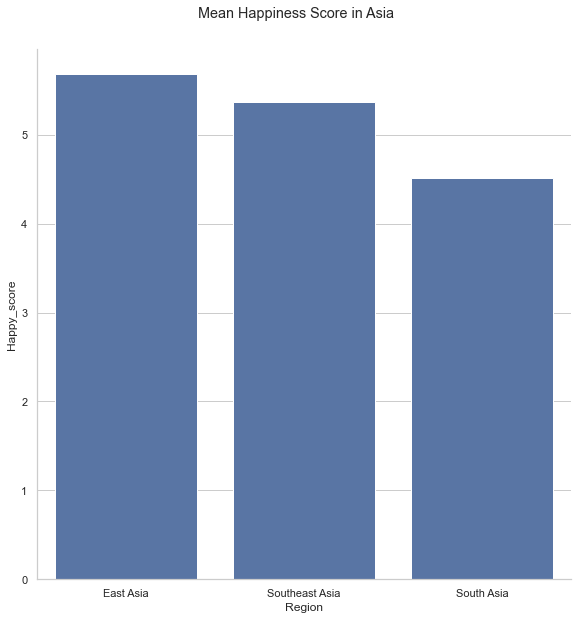

In [62]:
cols = ['East Asia', 'Southeast Asia','South Asia']
sns.reset_orig()
sns.set(style="whitegrid")
g = sns.catplot(x='Region', y='Happy_score', data=happy_region_mean[happy_region_mean['Region'].isin(cols)], 
                kind='bar', height=8, color='b', orient='v')
# g.set_xticklabels(rotation=90)
g.fig.suptitle('Mean Happiness Score in Asia', y=1.05)
plt.show()

In [63]:
happy_region_mean[happy_region_mean['Region'].isin(cols)]

,Region,Year,Happy_score,Log_GDP_per_capita,Social_support_score,Life_expectancy,Life_choice_score,Generosity_score,Corruption_perception_score
2,East Asia,2014.081633,5.682980,10.169143,0.868429,69.555776,0.711959,-0.035898,0.785490
7,Southeast Asia,2013.646552,5.368957,9.256578,0.809776,63.861000,0.865707,0.204198,0.733793
6,South Asia,2013.678161,4.512207,8.328448,0.652632,59.809736,0.688287,0.075529,0.809724


### Summary of analysis
- GDP per capita is the most significant in determining population happiness in Asia which ranges from 54% - 71%. In South Asia, 71% is related to GDP per capita in defining their happiness score, but it's only 54% in Southeast Asia. There are more questions from this assessment, and one can wonder if money can buy happiness, especially in South Asia.
- In Southeast Asia, GDP per capita plays 54% of happiness seems like they somewhat of a balance in what makes their population happy and being most generous, including having the best life choice score and the lowest perception of corruption.
- East Asia is the happiest in Asia, with the largest GDP per capita, Social Support, and Life expectancy but population being least generous in Asia.
- It is fascinating to see how different regions of Asia differ in how important money plays in happiness. It will be an interesting analysis to see how the political system, religion, and education level play into happiness score.
